# Esonero 1 - 8 Aprile 2021

Completare i seguenti esercizi tramite uno o più blocchi di codice e descrivendo le operazioni effettuate

### Punteggio Esercizi

    1a: 1
    1b: 1.5
    1c: 2
    1d: 1
    2: 1.5
    3: 1
    4: 1
    5: 1


In [35]:
import numpy as np
from skimage.color import rgb2gray
from scipy.ndimage import convolve

import imageio
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.ndimage import affine_transform
from scipy import linalg


import cv2
import skimage
import numpy as np
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt
import skimage.filters as skfilters

%matplotlib inline


def pcolor(image, figsize=None, gray=False):
    if not figsize is None:
        plt.figure(figsize=figsize)

    if gray:
        plt.imshow(image, cmap="gray")
    else:
        plt.imshow(image)
    
    plt.show()


def pgray(image, figsize=None):
    pcolor(image, figsize, True)


def print_info(image):
    print(f"shape: {image.shape}")
    print(f"dtype: {image.dtype}")
    print(f"min: {np.min(image)} max: {np.max(image)}")


def bgr_to_gray(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


def rgb_to_gray(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

def myimshow(I, **kwargs):
    # utility function to show image
    plt.figure();
    plt.axis('off')
    plt.imshow(I, cmap=plt.gray(), **kwargs)

In [36]:
def compute_line_parameters(point1, point2):
    # ax + by = c
    # m = -a/b   q = c/b
    a = point2[1] - point1[1]
    b = point1[0] - point2[0]
    c = a*(point1[0]) + b*(point1[1])
    if a != 0 and b != 0: 
        return [-a/b, c/b]


def hough_to_normal_coordinates(hough_lines):
    
    result = []

    for i in range(hough_lines.shape[0x0]):
        rho = hough_lines[i, 0x0, 0x0]
        theta = hough_lines[i, 0x0, 0x1]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 10000*(-b)), int(y0 + 10000*(a)))
        pt2 = (int(x0 - 10000*(-b)), int(y0 - 10000*(a)))
        
        line = compute_line_parameters(pt1, pt2)
        if line:
            result.append(line)
    
    return result


def houghP_to_normal_coordinates(hough_lines):
    
    result = []

    for i in range(hough_lines.shape[0]):
        pt1 = (hough_lines[i, 0x0, 0x0], hough_lines[i, 0x0, 0x1])
        pt2 = (hough_lines[i, 0x0, 0x2], hough_lines[i, 0x0, 0x3])
        
        line = compute_line_parameters(pt1, pt2)
        if line:
            result.append(line)
    
    return result
            

def plot_lines_and_image(image, normal_coordinate_lines):
    plt.figure(figsize=(29,29))
    plt.xlim([-2500, 7500])
    plt.ylim([2500,-7500])
    plt.imshow(image)
    for line in normal_coordinate_lines:
        f = lambda x: line[0]*x + line[1]
        x = np.linspace(-2500, 7500)
        y = f(x)
        plt.plot(x, y, 'r')
    plt.show()


def plot_x_and_image(image, hough_circles):
    working_image = image.copy()
    circles = np.round(hough_circles[0, :]).astype(np.uint)
    for (x, y, r) in circles:
        working_image = cv2.putText(working_image, 'X', (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0x0,0x0,0x0), 4, cv2.LINE_AA)
    
    plt.figure(figsize=(0x19, 0xf))
    plt.imshow(working_image)

# Esercizio 1

## Filtri di Gabor

Il filtro di Gabor (in forma semplificata) è definito dalla seguente funzione che restituisce due parti (reale e immaginaria)


$$RE_g(x,y,\omega,\theta) = \frac{\omega^2}{4\pi^3}\left[\exp\left\{-(\omega^2/8\pi^2) (4x'^2 + y'^2)\right\}\right]\exp\left(\pi^2/2\right)(\omega x \cos \theta)$$

$$IM_g(x,y,\omega,\theta) = \frac{\omega^2}{4\pi^3}\left[\exp\left\{-(\omega^2/8\pi^2) (4x'^2 + y'^2)\right\}\right]\exp\left(\pi^2/2\right)(\omega x \sin \theta)$$

dove $x' = x \cos \theta + y \sin \theta$ e $y' = y \cos \theta. - x \sin \theta$. L'implementazione è data dal codice sottostante: 

In [37]:
zebra =  rgb2gray(imageio.imread('zebra.jpg'))

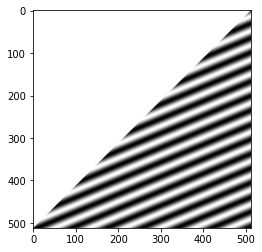

In [38]:
source = cv2.imread("/Users/t0re199/Documents/Uni/LM/Analisi Immagini e Video/Workspace/exam/cv_notebooks/test/Esonero1/mat224431/gabor1.jpg")
source = cv2.cvtColor(source, cv2.COLOR_BGR2RGB)
source = rgb_to_gray(source)
pgray(source)

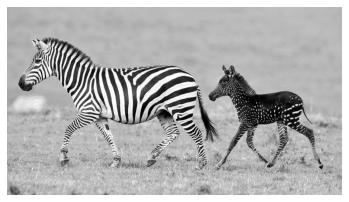

In [39]:
myimshow(zebra)

In [40]:
def genGabor(sz, omega, theta, func=np.cos):
    radius = (int(sz[0]/2.0), int(sz[1]/2.0))
    [x, y] = np.meshgrid(range(-radius[0], radius[0]), range(-radius[1], radius[1]))

    x1 = x * np.cos(theta) + y * np.sin(theta)
    y1 = -x * np.sin(theta) + y * np.cos(theta)
    
    gauss = omega**2 / (4*np.pi**3) * np.exp(- omega**2 / (8*np.pi**2) * ( 4 * x1**2 + y1**2))
    sinusoid = func(omega * x1) * np.exp(np.pi**2 / 2)
    gabor = gauss * sinusoid
    return gabor

`sz` rappresenta la dimensione del filtro, `omega` la frequenza e `theta` l'orientamento.

1. Plottare il filtro per valori a scelta dei parametri

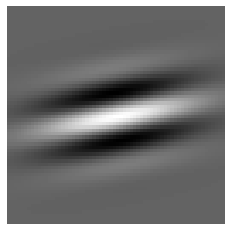

In [41]:
genGabor_filter = genGabor((0x40, 0x40), omega=0.4, theta=-45/np.pi) #questi sono i migliori parametri
myimshow(genGabor_filter)

2. Applicare il filtro di Gabor alla figura della zebra e plottare il risultato. Cosa potete dire del filtro?

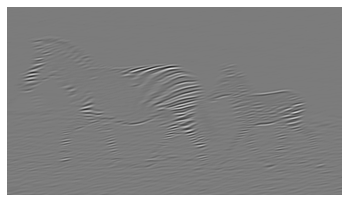

In [42]:
filtered_image = convolve(zebra, genGabor_filter)
myimshow(filtered_image)

Sembra un filtro passa alto, mette in evidenza transizione di intensità: sfoca tutto ma mette in evidenza le righe delle due zebbre

3. Aggiustare i parametri di ampiezza e rotazione per individuare le strisce verticali. plottare il risultato

In [43]:
#genGabor_filter = genGabor((0x40, 0x40), omega=0.4, theta=-45/np.pi) #riportati precedentemente
#myimshow(genGabor_filter)

Per la seguente immagine _gabor1.jpg_

![](gabor1.jpg)

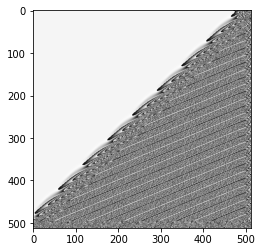

In [44]:
filtered_image = convolve(source, genGabor_filter)
pgray(filtered_image)

4. Qual è il filtro più semplice che permetterebbe di individuare i contorni? Giustificare la risposta

Il filtro di sobel in quanto l'immagine essendo in bianco e nero permette di estrarre bene le discontinuità.

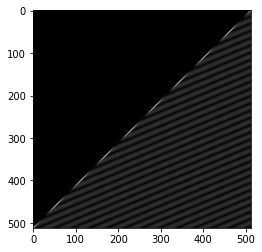

In [45]:
sobel_filtered = skimage.filters.sobel(source)
pgray(sobel_filtered)

Visto che le righe sono oblique, sarebbe meglio impiegare un filtro isotropico, produrrebbe dettagli migliori

In [46]:
iso_laplacian_filter = np.float32([
                                            [-0x1,-0x1,-0x1],
                                            [-0x1,0x8,-0x1],
                                            [-0x1,-0x1,-0x1]
                                        ])

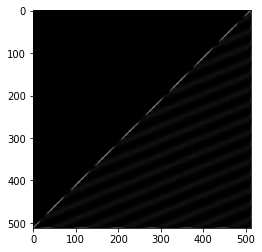

In [47]:
laplacian_filtered_image = cv2.filter2D(source, -0x1, iso_laplacian_filter)
pgray(laplacian_filtered_image)

Come era facile aspettarsi, le righe oblique, sono definite meglio rispetto all'operatore di sobel.

# Esercizio 2

Riconoscere il filtro che ha generato questa immagine a partire dall'immagine contenente le forme. Fornire un esempio.

![](filter2.jpg)

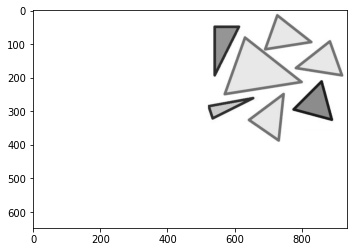

In [48]:
source = cv2.imread("/Users/t0re199/Documents/Uni/LM/Analisi Immagini e Video/Workspace/exam/cv_notebooks/test/Esonero1/mat224431/triangoli.jpg")
image = bgr_to_gray(source)
pgray(image)

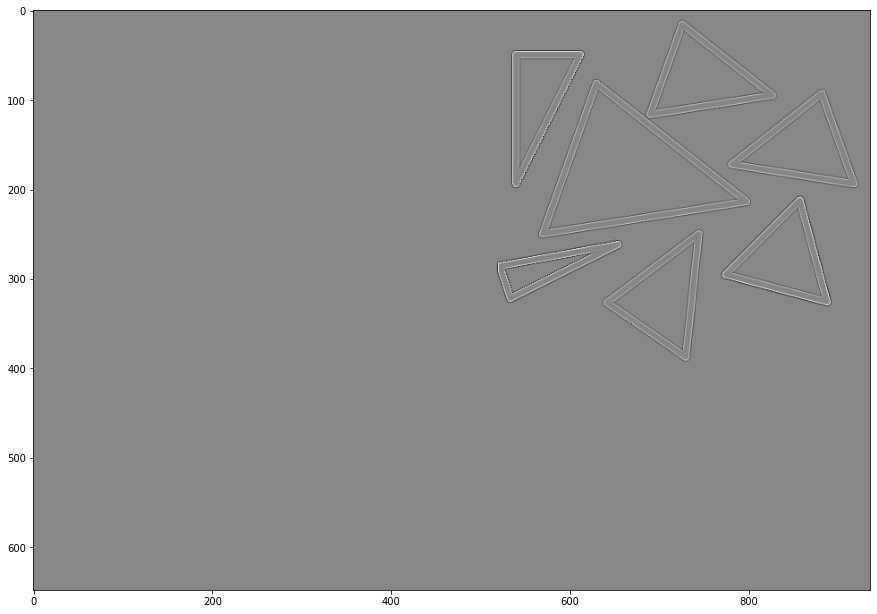

In [49]:
img = skimage.img_as_float32(image)
laplace = cv2.Laplacian(img, ddepth=-0x1, ksize=0x3, scale=0x1)
pgray(laplace, figsize=(0xf, 0xf))

L'immagine si presenta anonima su sfondo grigio, ottenuto dove i cambiamenti di intensita' sono costanti mentre sono evidenziati contorni ben delineati.  

Il filtro è un un filtro laplaciano

# Esercizio 3

Mostrare gli effetti e spiegare cosa succedequando si applica due volte un filtro gaussiano

Data un'immagine _img_ applicare il filtro gaussiano G

img1 = G(G(img))

A cosa equivale questa trasformazione?
Fornire un esempio

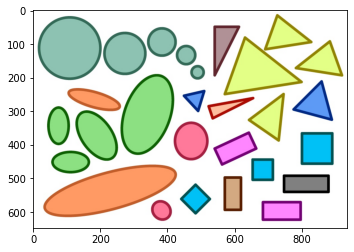

In [50]:
source = cv2.imread("/Users/t0re199/Documents/Uni/LM/Analisi Immagini e Video/Workspace/exam/cv_notebooks/test/Esonero1/mat224431/forme.jpg")
image = cv2.cvtColor(source, cv2.COLOR_BGR2RGB)
pcolor(image)

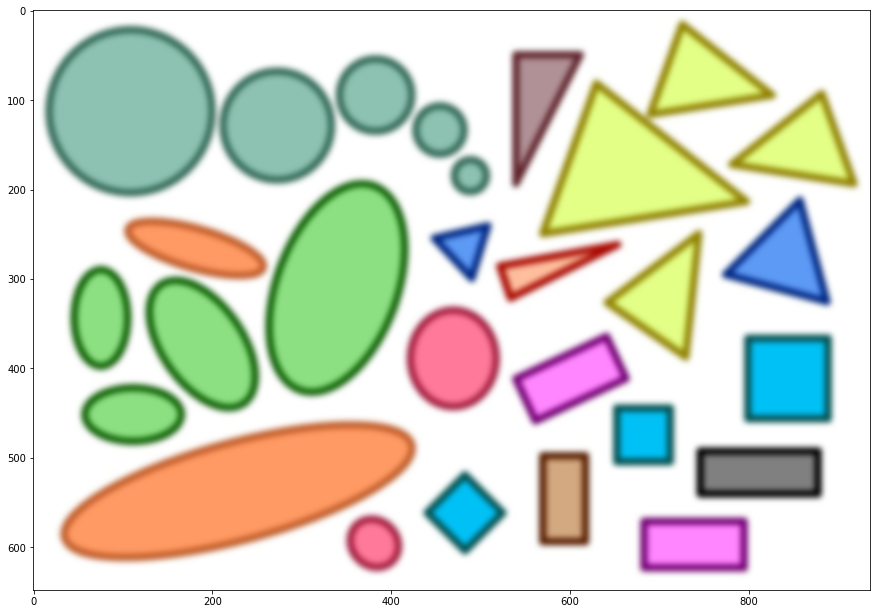

In [51]:
img1 = cv2.GaussianBlur(image, (0x9, 0x9), 0x3)
img1 = cv2.GaussianBlur(img1, (0x9, 0x9), 0x3)
pcolor(img1, figsize=(0xf, 0xf))

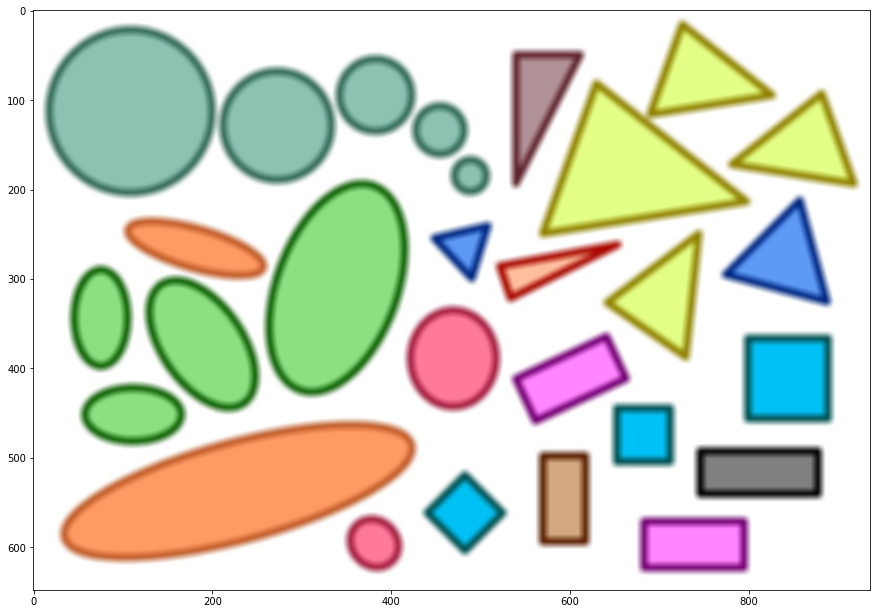

In [52]:
test1 = cv2.GaussianBlur(image, (0x9, 0x9), 0x6)
pcolor(test1, figsize=(0xf, 0xf))

Sembra essere equivalente ad applicare una volta il filtro gaussiano ma con sigma = 2*sigma

# Esercizio 4

Identificare i cerchi verdi tramite trasformata di Hough segnandoli con una X

![](forme.jpg)

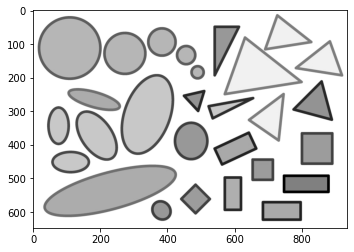

In [53]:
source = cv2.imread("/Users/t0re199/Documents/Uni/LM/Analisi Immagini e Video/Workspace/exam/cv_notebooks/test/Esonero1/mat224431/forme.jpg")
source = cv2.cvtColor(source, cv2.COLOR_BGR2RGB)
working_image = rgb2gray(source)
pgray(working_image)

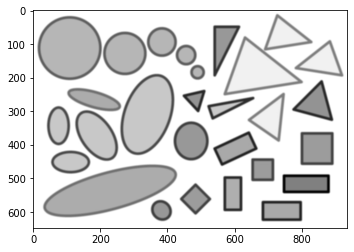

In [54]:
working_image = cv2.GaussianBlur(working_image, (0x5, 0x5), 0x6)
pgray(working_image)

In [55]:
working_image = skimage.img_as_ubyte(working_image)

In [56]:
circles = cv2.HoughCircles(working_image, cv2.HOUGH_GRADIENT, 0.9, minDist=40, param1=100, param2=80, minRadius=20, maxRadius=100)
circles.shape

(1, 6, 3)

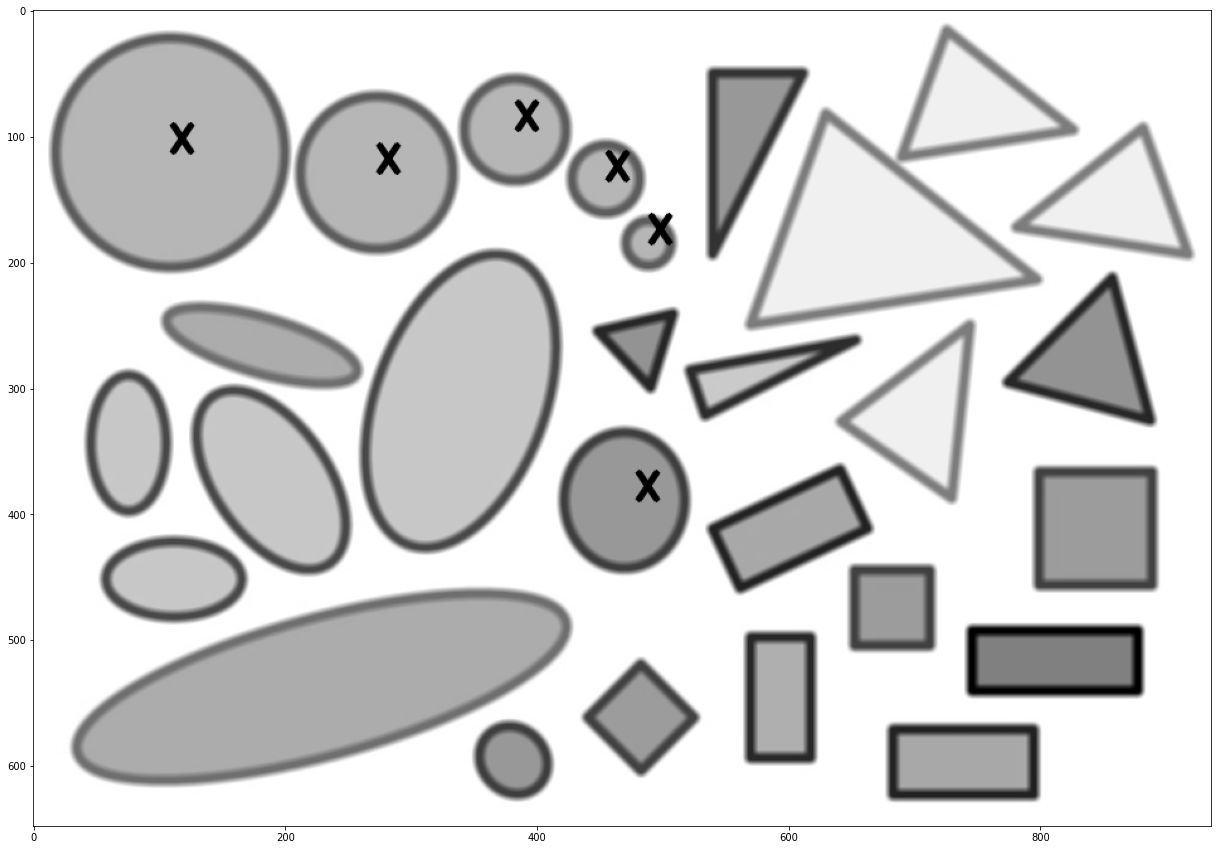

In [57]:
plot_x_and_image(working_image, circles)

# Esercizio 5

Definire una matrice di roto traslazione che effettua una rotazione di 55° in senso orario in (15, 25) e una traslazione di 50 px sull'asse x.

Mostrare e descrivere tutti i passaggi: dalla definizione della matrice all'applicazione della trasformazione

In [58]:
angle = 55 * np.pi / 180.0

rotation_matrix = np.array([
                            [np.cos(angle), -np.sin(angle)],
                            [np.sin(angle), np.cos(angle)]
                            ])

traslation_matrix = np.float32([
                                [1,0,50],
                                [0,1,0]
                            ])

In [59]:
source = cv2.imread("/Users/t0re199/Documents/Uni/LM/Analisi Immagini e Video/Workspace/exam/cv_notebooks/test/Esonero1/mat224431/gabor1.jpg")
source = cv2.cvtColor(source, cv2.COLOR_BGR2RGB)
source = rgb_to_gray(source)

In [60]:
center = np.array((15,25))
offset=(center-center.dot(rotation_matrix)).dot(linalg.inv(rotation_matrix))
rotated_image=affine_transform(source,rotation_matrix,order=2,offset=-offset)

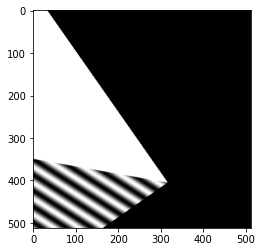

In [61]:
pgray(rotated_image)

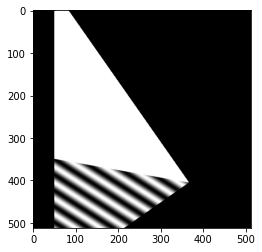

In [62]:
translated_image = cv2.warpAffine(rotated_image, traslation_matrix, (source.shape[0x1], source.shape[0x0]))
pgray(translated_image)

In [63]:
overall = np.array([
                            [np.cos(angle), -np.sin(angle), 50],
                            [np.sin(angle), np.cos(angle), 0]
                            ])

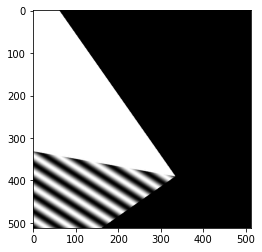

In [34]:
overall_transform = affine_transform(source,overall,order=2,offset=-offset)
pgray(overall_transform)